In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
traindf = pd.read_csv("train.csv")
traindf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
testdf = pd.read_csv("test.csv")
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
#menghitung missing value
traindf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Handling missing value
traindf = traindf.drop(columns='Cabin', axis=1)
# Handle missing values in the "Age" column by filling with the mean age
traindf['Age'].fillna(traindf['Age'].mean(), inplace=True) 
traindf['Embarked'].mode()
traindf['Embarked'].mode()[0]
traindf['Embarked'].fillna(traindf['Embarked'].mode()[0], inplace=True)

In [6]:
traindf.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
traindf['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
testdf.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#Handling missing value
testdf = testdf.drop(columns='Cabin', axis=1)
# Handle missing values in the "Age" column by filling with the mean age
testdf['Age'].fillna(testdf['Age'].mean(), inplace=True) 
testdf['Fare'].mode()
testdf['Fare'].mode()[0]
testdf['Fare'].fillna(testdf['Fare'].mode()[0], inplace=True)

In [10]:
testdf.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
testdf['PassengerId'].value_counts()

892     1
1205    1
1177    1
1176    1
1175    1
       ..
1028    1
1027    1
1026    1
1025    1
1309    1
Name: PassengerId, Length: 418, dtype: int64

In [12]:
traindf.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [13]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


### EXPLORATORY DATA ANALYSIS

In [14]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
def correlation_matrix():
    numeric_columns = traindf[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
    correlation_matrix = numeric_columns.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation matrix')
    plt.show()

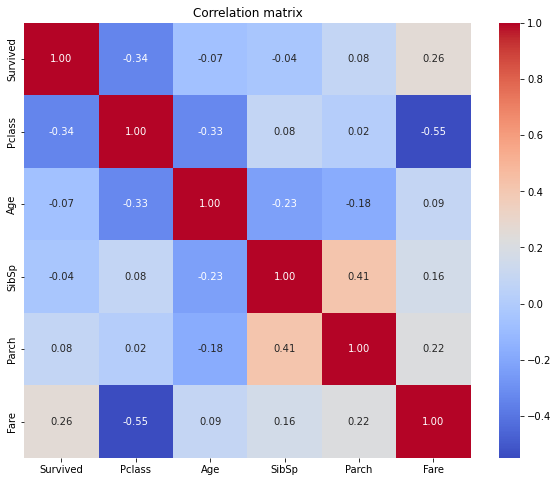

In [16]:
correlation_matrix()

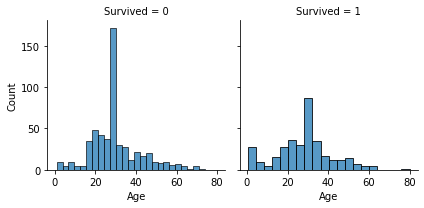

In [17]:
# Explore Age vs Survived
g = sns.FacetGrid(traindf, col='Survived')
g = g.map(sns.histplot, "Age")

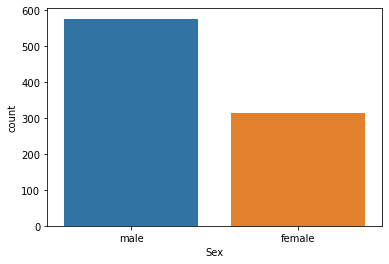

In [18]:
traindf['Sex'].value_counts()
sns.countplot(x='Sex', data=traindf)
plt.show()

In [19]:
female = traindf.loc[traindf.Sex == 'female']["Survived"]
male = traindf.loc[traindf.Sex == 'male']["Survived"]
rate_female = sum(female)/len(female)
rate_male = sum(male)/len(male)
print("% of female who survived:", rate_female)
print("% of male who survived:", rate_male)

% of female who survived: 0.7420382165605095
% of male who survived: 0.18890814558058924


In [20]:
traindf = traindf.drop(['Name','PassengerId', 'Ticket'], axis=1)
testdf = testdf.drop(['Name','Ticket'], axis=1)
combine = [traindf, testdf]
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map({'female':1, 'male':0}).astype(int)
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [23]:
fp = traindf.Embarked.dropna().mode()[0]
fp

'S'

In [24]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(fp)
traindf[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [27]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


### Splitting the data

In [28]:
x_train = traindf.drop("Survived", axis=1)
y_train = traindf["Survived"]
x_test = testdf.drop("PassengerId", axis=1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 7), (891,), (418, 7))

In [30]:
#Random forest
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=100, class_weight='balanced')
rfc.fit(x_train, y_train)
# fit the model to the training set
rfc.fit(x_train, y_train)
# Predict on the test set results
y_pred = rfc.predict(x_test)
acc_rfc = round(rfc.score(x_train, y_train)*100, 2)
acc_rfc

91.02

In [31]:
#SVM
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
acc_svc=round(svc.score(x_train, y_train)*100, 2)
acc_svc

68.13

In [32]:
#knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
acc_knn=round(knn.score(x_train, y_train)*100, 2)
acc_knn

82.94

In [39]:
#adaboost
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier()
ada_boost.fit(x_train, y_train)
y_pred=ada_boost.predict(x_test)
acc_adab=round(ada_boost.score(x_train, y_train)*100, 2)
acc_adab

83.39

In [40]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred=dtc.predict(x_test)
acc_dtc=round(dtc.score(x_train, y_train)*100, 2)
acc_dtc

98.2

In [41]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)
acc_LR=round(LR.score(x_train, y_train)*100, 2)
acc_LR

80.47

In [42]:
models =pd.DataFrame({
    'Model' : ['Random Forest', 'Support Vector Machines', 'KNN', 'AdaBoost', 'Decision Tree', 'Logistic Regression'],
    'Score' : [acc_rfc, acc_svc, acc_knn, acc_adab, acc_dtc, acc_LR]
})

models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,98.20
0,Random Forest,91.02
3,AdaBoost,83.39
2,KNN,82.94
5,Logistic Regression,80.47
1,Support Vector Machines,68.13


In [33]:
output = pd.DataFrame({'PassengerId': testdf.PassengerId, 'Survived': y_pred})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [34]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
